# World Happiness Report Project

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset and showing first 5 rows

In [2]:
df_happy = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df_happy.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Exploratory Data Analysis(EDA)

In [3]:
#checking the dimension of the dataset
df_happy.shape

(158, 12)

This database contains 158 rows and 12 columns.

In [4]:
#getting the information from the dataset
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
#Checking the types of columns
df_happy.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

We can see there are 3 different types of data (int,folat and object) present in the dataset.

In [6]:
# checking for the missing values
df_happy.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

We can see there are no missing values present in the dataset.

### Statistical analysis of the dataset

In [7]:
#summary of numerical dataset
df_happy.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The summary of the dataset looks perfect since there is no negative/invalid values present in it. the observations we make from the above are as follows:--

The counts of all the columns are same i.e,158 which means there are no missing values present in it.


In [8]:
#seggregating the numerical columns
num_col=[]
for i in df_happy.dtypes.index:
    if df_happy.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns:", num_col)

Numerical Columns: ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


### Visualization

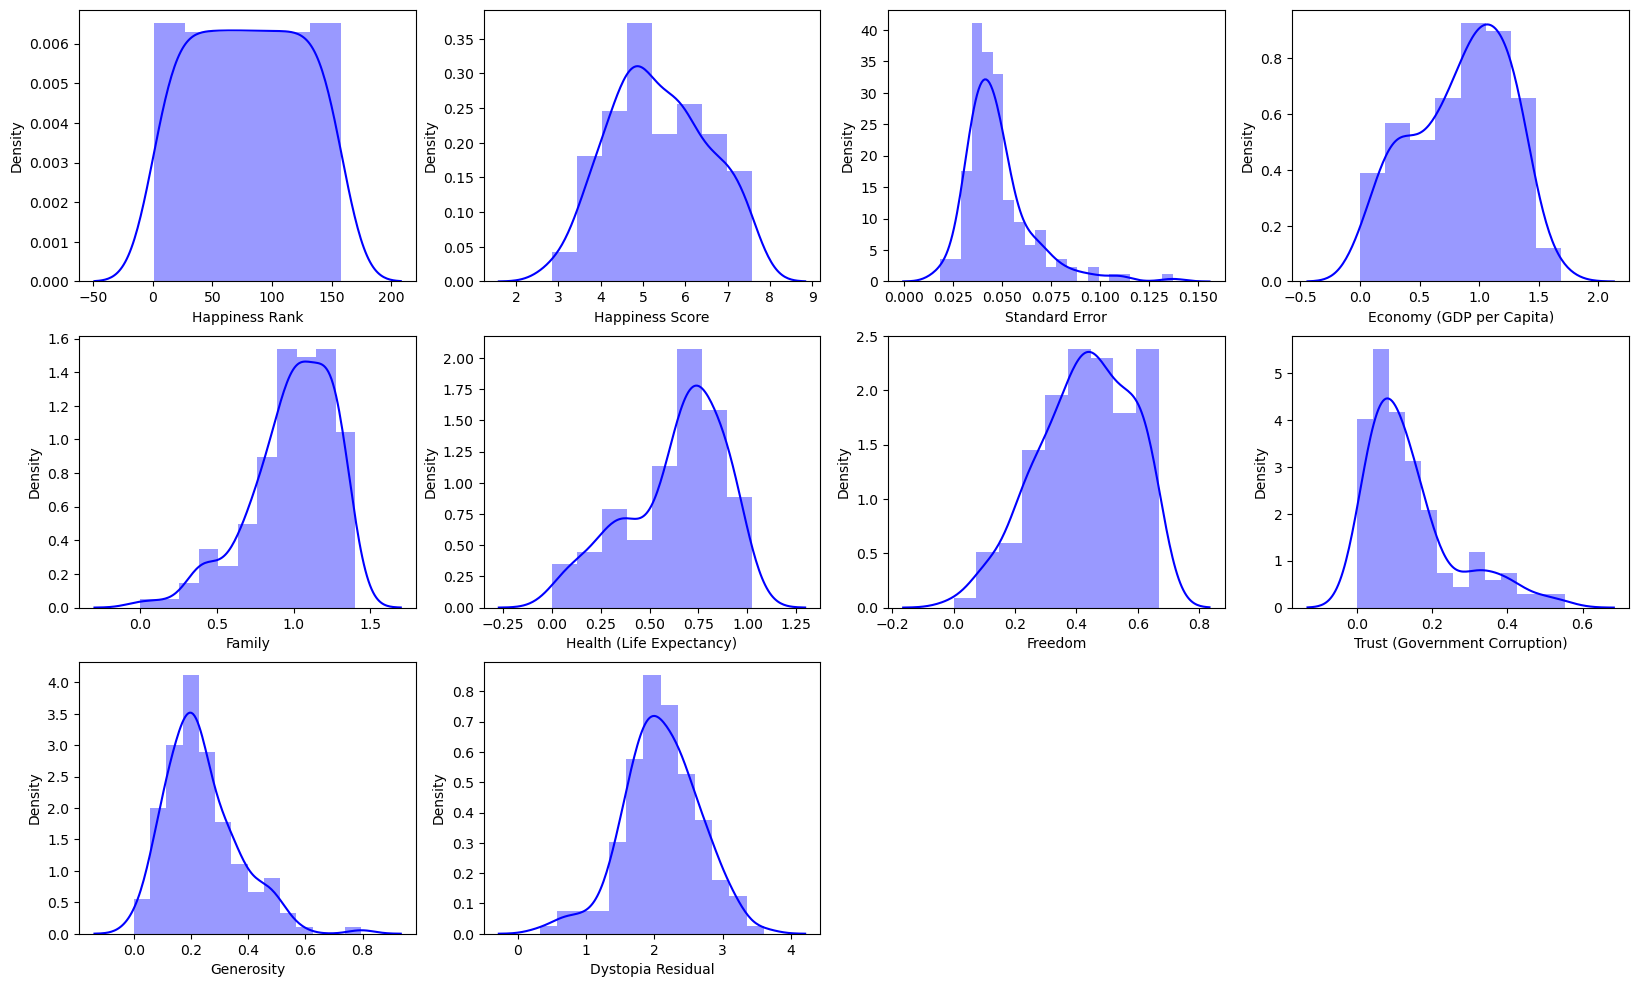

In [11]:
#visualization of data distribution for numerical column
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber <= 10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df_happy[column],color='b')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

From the above distribution plots, we can see that the data looks like normally distributed(showing bell shaped curve) for all the columns.Some columns looking slightly skewed but i am keeping as it is, as our dataset size is quite small.

### Dystopia :
#### Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.  So let,s find out.

In [12]:
# Health (Life Expectancy)
df_happy.loc[df_happy['Health (Life Expectancy)'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.0,0.4084,0.08786,0.21488,2.51009


In [13]:
# Lowest income
df_happy.loc[df_happy['Economy (GDP per Capita)'] == 0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.0368,0.0,1.0012,0.09806,0.22605,0.07625,0.24834,2.86712


In [14]:
# lowest generosity
df_happy.loc[df_happy['Generosity'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.0,1.80101


In [15]:
#  most corruption
df_happy.loc[df_happy['Trust (Government Corruption)'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.0,0.51535,1.86399


In [16]:
#  least freedom
df_happy.loc[df_happy['Freedom'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


### Dystopia includes:
#### Following are the least performing countries
Lowest life expectancy : Sierra Leone     
Lowest income  : Congo (Kinshasa)    
Lowest generosity : Greece    
Most corruption : Indonesia    
Least freedom  :  Iraq   

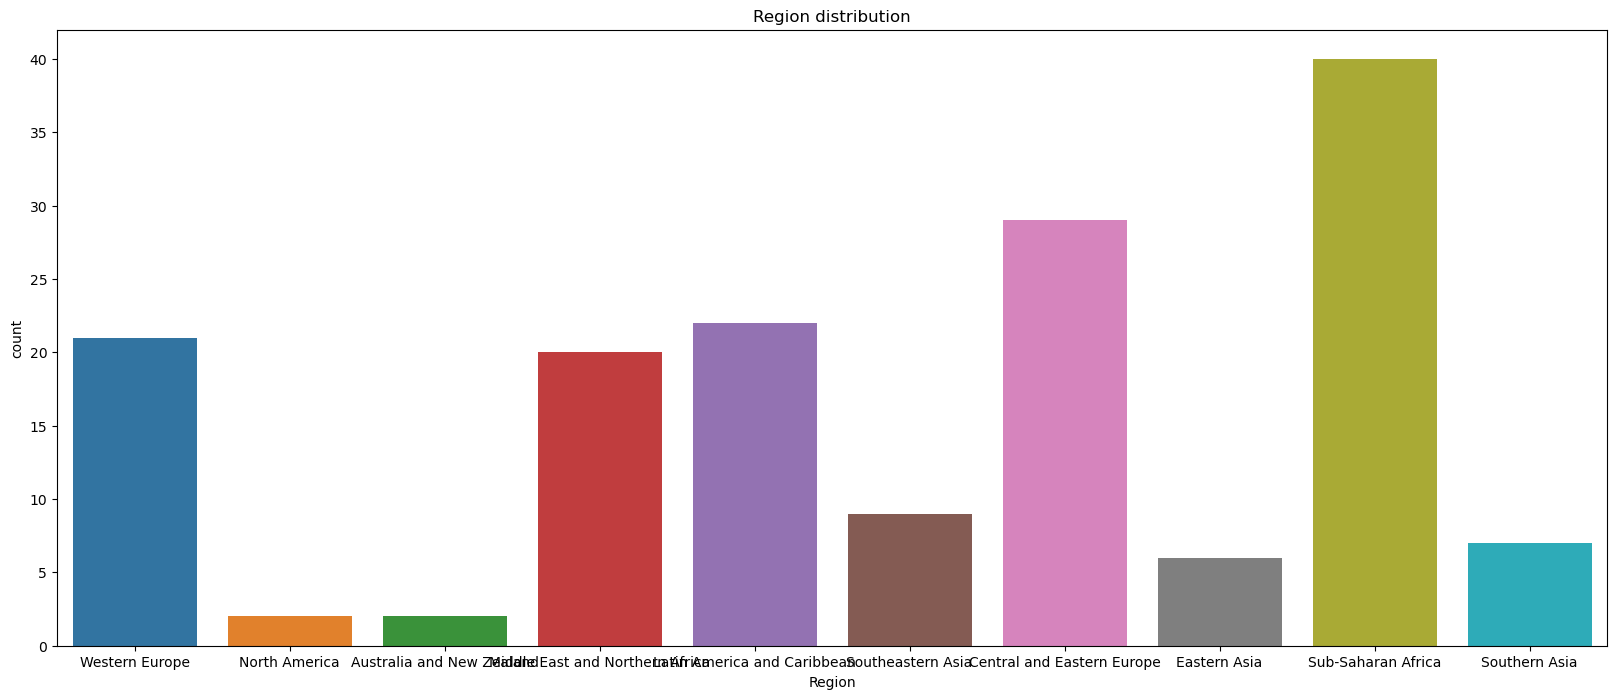

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


In [21]:
#Visualizing the Region Distribution
plt.figure(figsize=(20,8))
ax=sns.countplot(x='Region',data=df_happy)
plt.title('Region distribution')
plt.show()
print(df_happy['Region'].value_counts())

In [23]:
#dropping happiness rank from the dataset
df_happy = df_happy.drop(['Happiness Rank'],axis=1)

In [24]:
df_happy.shape

(158, 11)

### Correlation using Heatmap

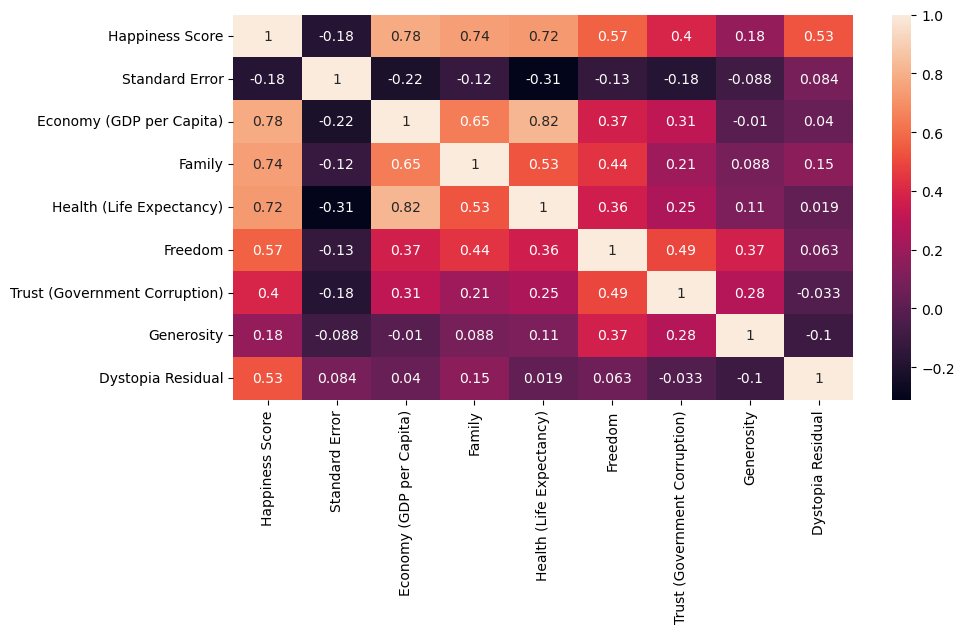

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df_happy.corr(), annot = True)
plt.show()

From above correlation matrix, we can see the positive as well as negative correlations between the label and other features. 
The Economy, Family, Health(Life expectancy,Freedom columns have strong posive coreelation with 'Happiness Score'.

 ### Separating the features and target

In [26]:
x = df_happy.drop(['Happiness Score'],axis=1)
y = df_happy['Happiness Score']

In [27]:
x.shape

(158, 10)

### Visualizing the relationship of features with the label/target.

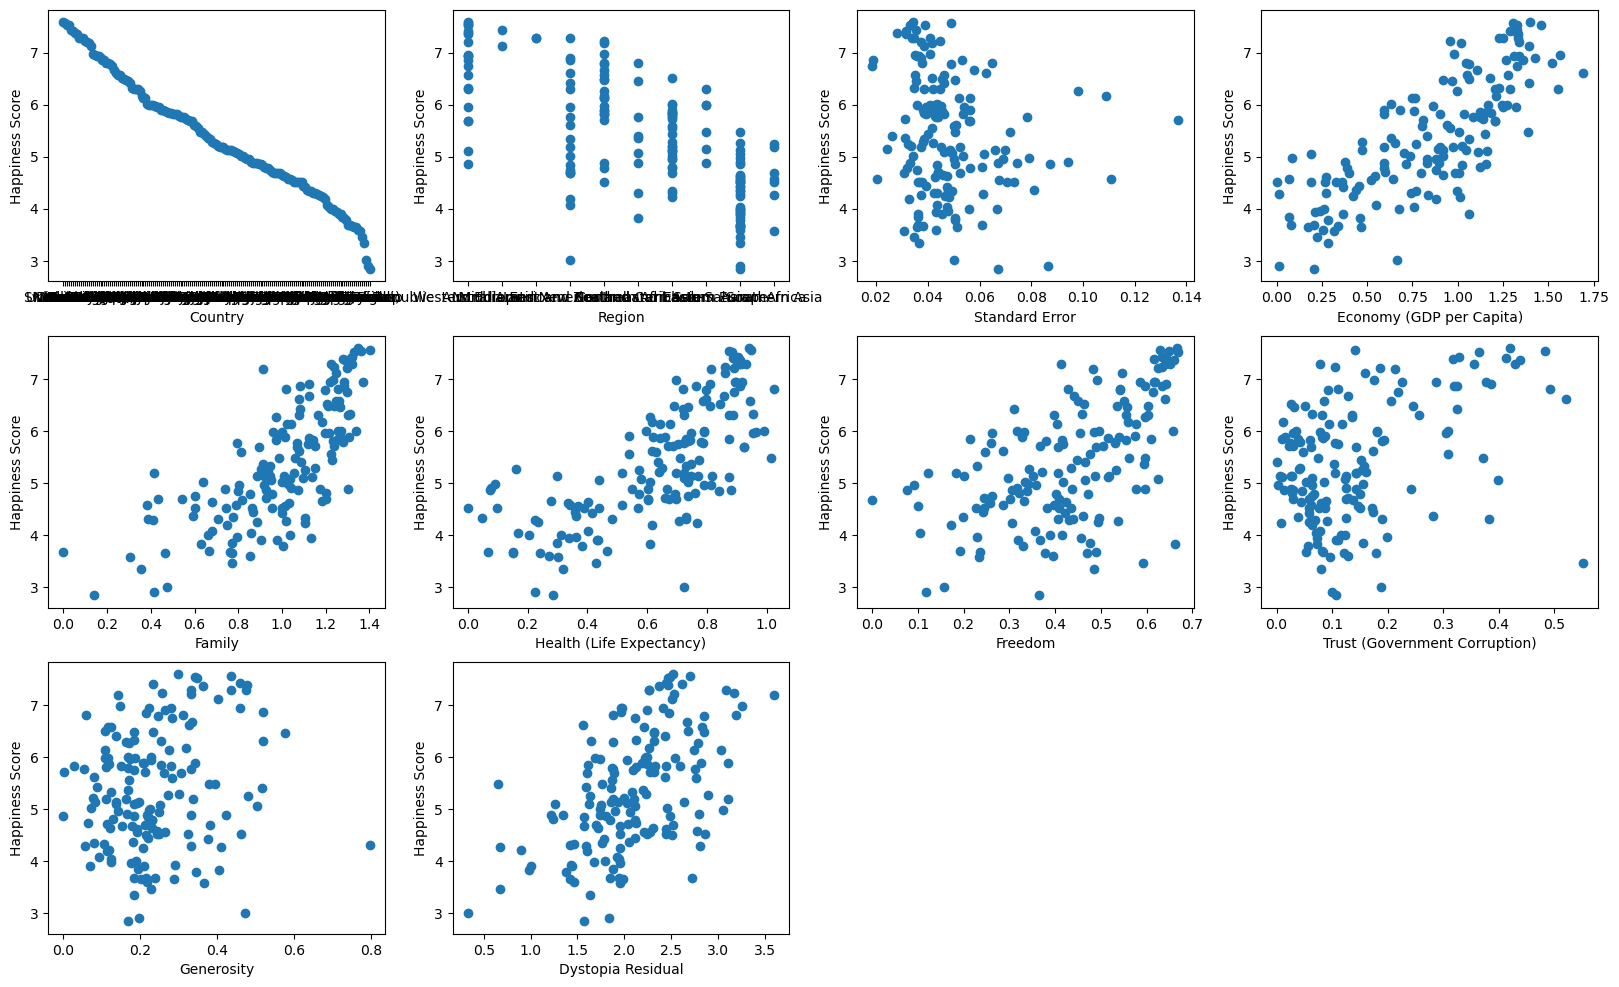

In [31]:
plt.figure(figsize=(20,12), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <= 10:
        ax=plt.subplot(3,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Happiness Score',fontsize=10)
    plotnumber+=1
plt.show()

#### From above we can notice that the features those have positive response towards the target and contributing most for the happieness score are 'Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)'and 'Generosity'.      
#### So, taking only the above 'six' features for model building.

In [34]:
x = x.drop(['Country','Region','Standard Error','Dystopia Residual'],axis=1)


In [36]:
x.shape

(158, 6)

In [37]:
x.columns

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

#### Splitting the data into Train and Test Set.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

Here using the 80% data for the training set and 20% data for the testing set.

## Model Building(Regression)

### Linear Regression

In [39]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [40]:
# Model Evaluation
y_pred=model1.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(model1.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model1.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :80%
R2 score(Testing Accuracy) :67%
MAE(Mean absolute Error) : 0.54
MSE(Mean Squared Error) : 0.48
RMSE(Root Mean squared Error) : 0.74


### Decision Tree Regressor

In [41]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [42]:
# Model Evaluation
y_pred=model2.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(model2.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model2.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :100%
R2 score(Testing Accuracy) :68%
MAE(Mean absolute Error) : 0.57
MSE(Mean Squared Error) : 0.46
RMSE(Root Mean squared Error) : 0.75


### Random Forest Regressor

In [43]:
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

RandomForestRegressor()

In [44]:
# Model Evaluation
y_pred=model3.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(model3.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model3.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :97%
R2 score(Testing Accuracy) :71%
MAE(Mean absolute Error) : 0.52
MSE(Mean Squared Error) : 0.42
RMSE(Root Mean squared Error) : 0.72


### Gradient Boosting Regressor

In [45]:
model4 = GradientBoostingRegressor()
model4.fit(x_train, y_train)

GradientBoostingRegressor()

In [46]:
# Model Evaluation
y_pred=model4.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(model4.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model4.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred)))

R2 Score(Training Accuracy) :99%
R2 score(Testing Accuracy) :68%
MAE(Mean absolute Error) : 0.56
MSE(Mean Squared Error) : 0.46
RMSE(Root Mean squared Error) : 0.75


We can choose 'Linear Regression' as our final model as the difference between training and testing score is minimum here. 